# Normal equation

Used to find the value of $\theta$ that minimizes the MSE

$\hat{\theta}$ = $(X^{T}X)^{-1} X^{T} y$

$\hat{\theta}$ - the value of $\theta$ parameter that minimizes the cost function
y - is the vector of target values containing $y^{(1)}$ to $y^{(m)}$

Text(0, 0.5, 'y')

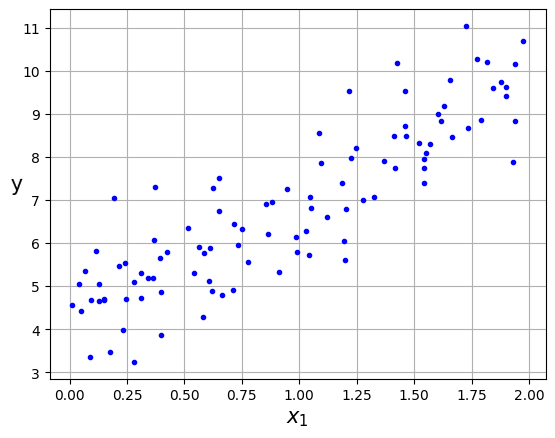

In [36]:
# Let's write normal equation
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100 # number of instances
X = 2 * np.random.rand(m, 1) # column vector
y = 4 + 3 * X + np.random.randn(m, 1) # column vector

plt.plot(X, y, "b.")
plt.grid(1)
plt.xlabel("$x_{1}$", fontsize=15)
plt.ylabel("y", fontsize=15, rotation=1)

In [29]:
# Now let's compute parameter 
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # add x0 = 1 to each instance 
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y # inv() function to compute the inverse of a matrix

theta_best

array([[4.21509616],
       [2.77011339]])

In [30]:
# Let's predict using the best theta (parameter)
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

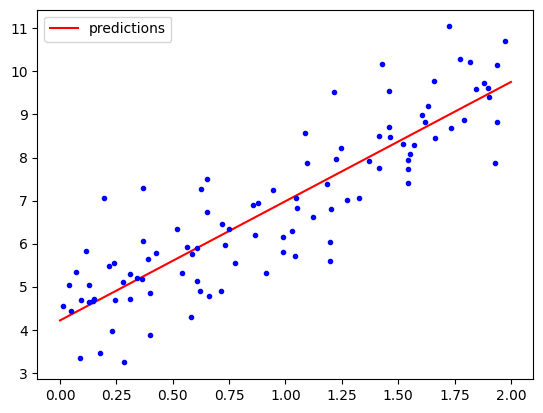

In [38]:
plt.plot(X_new, y_predict, c="red", label="predictions")
plt.plot(X, y, "b.")
plt.legend()
plt.show()

In [6]:
# Perform linear regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

lin_reg.predict(X_new)

NameError: name 'X' is not defined

In [122]:
# To use linear regression with stochastic GD use SGDRegressor
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100)

sgd_reg.fit(np.random.randn(2, 2), np.random.randn(1, 2).ravel()) # y.ravel() because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, tol=1e-05)

In [32]:
sgd_reg.intercept_, sgd_reg.coef_

(array([-0.04684223]), array([-0.3685031 ,  0.53129649]))

# Polynomial Regression

Used to train on non-linear data

In [35]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0,.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

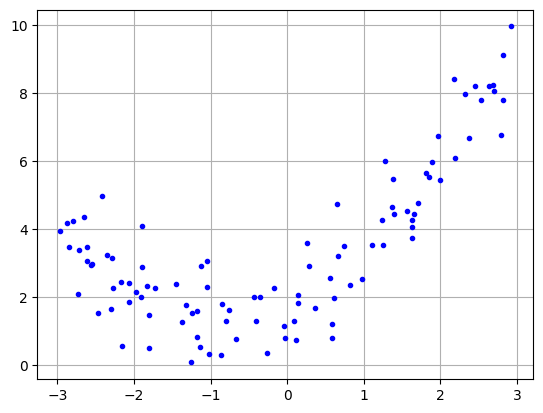

In [45]:
import matplotlib.pyplot as plt

plt.plot(X, y[1], "b.")
plt.grid(True)

In [88]:
# Add a square of each feature in the training set as a new feature
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X[0]**2, X_poly[0]

(array([-0.75275929]), array([0.56664654]), array([-0.75275929,  0.56664654]))

In [60]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y[1])
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [75]:
np.linspace(1, 3, 4) # reach from 1 to 3 in 4 steps

array([1.        , 1.66666667, 2.33333333, 3.        ])

Text(0.5, 1.0, 'This model is underfitting')

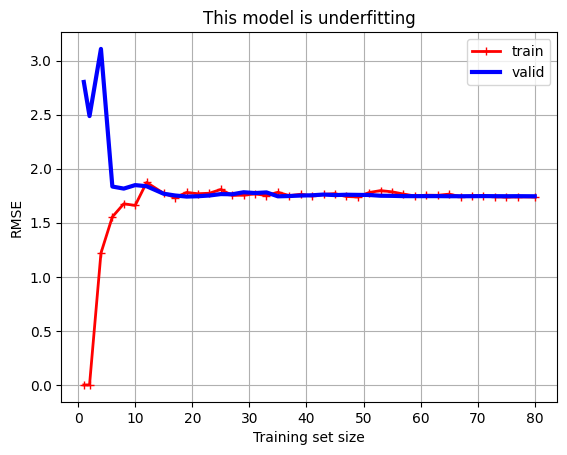

In [84]:
# Learning_curve trains and evaluates the model using cross-validation
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y[1], train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.grid(1)
plt.legend()
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.title("This model is underfitting")

In [92]:
valid_errors

array([2.80211523, 2.4866149 , 3.10778145, 1.83476451, 1.81585796,
       1.84822263, 1.83766998, 1.76806648, 1.75211426, 1.7420777 ,
       1.74526237, 1.75197152, 1.76503282, 1.76326358, 1.7821654 ,
       1.77464973, 1.78066051, 1.74443062, 1.74714572, 1.75160803,
       1.75422075, 1.76072213, 1.75596944, 1.75917901, 1.75768614,
       1.75677089, 1.74969838, 1.74871877, 1.74622283, 1.74591716,
       1.74614881, 1.74620691, 1.74528147, 1.74536197, 1.74559165,
       1.74647787, 1.74586345, 1.74533141, 1.74588422, 1.74483238])

(0.0, 80.0, 0.0, 3.0)

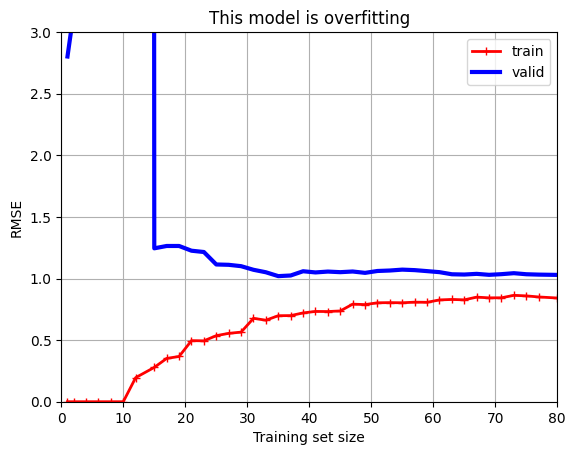

In [105]:
# Let's try now with 10th-degree polynomial model on the same data
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(PolynomialFeatures(degree=10, include_bias=False), LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y[1], train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.grid(1)
plt.legend()
plt.title("This model is overfitting")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.axis([0, 80, 0, 3])

In [106]:
# Ridge regression is regularized version of linear regression (uses L2 reg.)
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y[1])
ridge_reg.predict([[1.5]])

array([[4.82899748]])

In [127]:
# Lasso Regression is another regularized version of linear regression (uses L1 reg.)
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y[1])

# But you can also use SGDRegressor(penalty="l1", alpha=0.1) instead
sgd = SGDRegressor(penalty="l1", alpha=0.1)
sgd.fit(X, y[1].ravel())

lasso_reg.predict([[1.5]]), sgd.predict([[1.5]])

(array([4.77621741]), array([4.73449904]))

# Logistic Regression with Iris dataset

In [3]:
# Load the dataset
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

In [5]:
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [6]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [7]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int32

In [8]:
type(iris)

sklearn.utils._bunch.Bunch

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Text(0, 0.5, 'Probability')

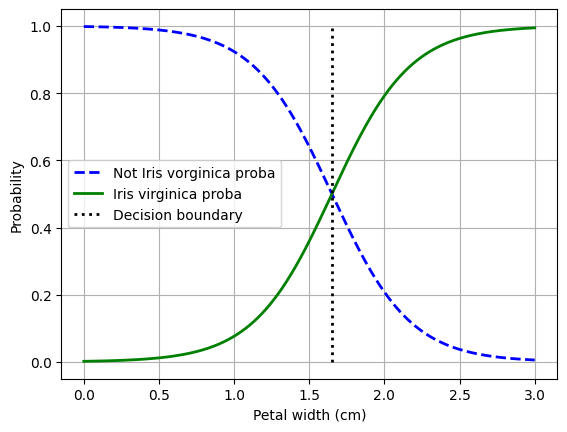

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == "virginica"

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris vorginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="Decision boundary")
plt.legend()
plt.grid(1)
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")

In [67]:
decision_boundary

1.6516516516516517

In [68]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

In [69]:
# Now let's use Softmax Regression for multiclass classification
# LogisticRegression uses Softmax automatically when you train it on more than two classes

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30) # C is how strong to regularize. !The higher the less regularized!
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30)

In [78]:
iris.target_names[softmax_reg.predict([[5, 2]])]

array(['virginica'], dtype='<U10')

In [85]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])